In [75]:
from arcgis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import pandas as pd

In [76]:
gis = GIS("pro")

<Item title:"USA Current Wildfires" type:Feature Layer Collection owner:esri_livefeeds2>
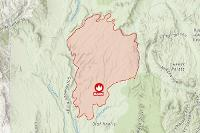

In [77]:
item = gis.content.get("d957997ccee7408287a963600a77f61f")
item

In [78]:
daysQuery = "FireDiscoveryAge < 183"
fires = item.layers[0].query(where=daysQuery)
fires.sdf.head()

,OBJECTID,IncidentName,IncidentTypeCategory,UniqueFireIdentifier,DailyAcres,CalculatedAcres,PercentContained,ICS209ReportDateTime,FireDiscoveryDateTime,DiscoveryAcres,POOCounty,POOState,FireCause,FireCauseGeneral,GACC,TotalIncidentPersonnel,IncidentManagementOrganization,FireMgmtComplexity,ResidencesDestroyed,OtherStructuresDestroyed,Injuries,Fatalities,PredominantFuelGroup,PredominantFuelModel,PrimaryFuelModel,ContainmentDateTime,ControlDateTime,FinalAcres,IsValid,FireOutDateTime,ModifiedOnDateTime,IncidentTypeKind,IrwinID,GlobalID,ModifiedOnAge,FireDiscoveryAge,SHAPE
0,1,Fairfield Pile Burn RX,RX,2023-IDSTF-000007,1.0,<NA>,<NA>,NaT,2023-01-03 21:55:01,1.0,Elmore,US-ID,Undetermined,<NA>,GBCC,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,NaT,<NA>,1,NaT,2023-05-17 22:33:52,FI,dae2f7cb-81a2-43cb-a75c-b1efb2ed0e53,dae2f7cb-81a2-43cb-a75c-b1efb2ed0e53,1,135,"{""x"": -115.16289999999998, ""y"": 43.61560000000..."
1,2,Sherwood Creek Piles RX,RX,2023-COBLX-000007,1.0,<NA>,<NA>,NaT,2023-01-03 16:45:00,1.0,Boulder,US-CO,Undetermined,<NA>,RMCC,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,NaT,<NA>,1,NaT,2023-05-17 17:11:07,FI,9feb560f-50bf-4236-b872-27fa0911a0a3,9feb560f-50bf-4236-b872-27fa0911a0a3,1,135,"{""x"": -105.52329999999995, ""y"": 39.98105000000..."
2,3,Glen Haven 3 RX,RX,2023-COARF-000028,1.0,<NA>,<NA>,NaT,2023-01-15 07:00:00,1.0,Larimer,US-CO,Undetermined,<NA>,RMCC,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,NaT,<NA>,1,NaT,2023-05-17 16:26:33,FI,b39704ff-e8a8-4ba4-93e0-dbf4054bba7c,b39704ff-e8a8-4ba4-93e0-dbf4054bba7c,1,124,"{""x"": -105.47409999999996, ""y"": 40.43540000000..."
3,4,Poncha Loop Piles,RX,2023-COPSF-000071,68.0,<NA>,<NA>,NaT,2023-02-14 16:26:42,1.0,Saguache,US-CO,Undetermined,<NA>,RMCC,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,NaT,<NA>,1,NaT,2023-05-11 20:51:22,FI,b4504e31-3c97-442e-b2fa-27ec05027e65,b4504e31-3c97-442e-b2fa-27ec05027e65,7,93,"{""x"": -106.10829999999999, ""y"": 38.41256000000..."
4,5,Cleveland Mountain Piles,RX,2023-COPSF-000078,174.0,<NA>,<NA>,NaT,2023-02-16 16:00:13,1.0,Chaffee,US-CO,Undetermined,<NA>,RMCC,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,NaT,<NA>,1,NaT,2023-05-11 20:53:26,FI,89a9994a-b1f4-4c6b-a307-628d59ed4461,89a9994a-b1f4-4c6b-a307-628d59ed4461,7,91,"{""x"": -106.11949999999996, ""y"": 38.47282000000..."


In [79]:
m1 = GIS().map("United States")
m1.add_layer(fires)
m1

#Basemap

MapView(layout=Layout(height='400px', width='100%'))

In [ ]:
fcPath = r"C:\Demos\PYTS\SanDiego.gdb\RecentWildfires"
fires.sdf.spatial.to_featureclass(fcPath)

In [ ]:
arcpy.analysis.SpatialJoin("USA States", "RecentWildfires", "WildfiresPerState")

In [ ]:
wfState_sdf = pd.DataFrame.spatial.from_featureclass('WildfiresPerState')
wfState_sdf = wfState_sdf[["STATE_NAME","STATE_ABBR", "SUB_REGION", "Join_Count"]]
wfState_sdf 

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.subplots(figsize=(20,6))
states = wfState_sdf['STATE_ABBR']
counts = wfState_sdf['Join_Count']
plt.bar(states,counts, color = 'darkorange')
plt.show()

In [ ]:
wfState_sdf.groupby(['SUB_REGION']).sum()

In [ ]:
plt.subplots(figsize=(20,6))
plt.barh(wfState_sdf.SUB_REGION, wfState_sdf.Join_Count, color = 'darkorange')
plt.show()